<a href="https://colab.research.google.com/github/Linkonb/Mobile_Finance_Fraud_Detection/blob/main/Mobile_Finance_Fraud_Detection_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
data_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PS_20174392719_1491204439457_log.csv')

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
data_df.count()

step              6362620
type              6362620
amount            6362620
nameOrig          6362620
oldbalanceOrg     6362620
newbalanceOrig    6362620
nameDest          6362620
oldbalanceDest    6362620
newbalanceDest    6362620
isFraud           6362620
isFlaggedFraud    6362620
dtype: int64

In [5]:
data_df=data_df.dropna()
data_df.count()
data_df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [6]:
data_df['SnameOrig']=data_df['nameOrig'].str[0:1]

In [7]:
data_df['SnameOrig'].head(10)

0    C
1    C
2    C
3    C
4    C
5    C
6    C
7    C
8    C
9    C
Name: SnameOrig, dtype: object

In [8]:
data_df['SnameDest']=data_df['nameDest'].str[0:1]

In [48]:
data_df['SnameDest'].head(10)

0    1
1    1
2    0
3    0
4    1
5    1
6    1
7    1
8    1
9    0
Name: SnameDest, dtype: int64

In [61]:
data_df['step_days']=data_df['step']%7
data_df['step_hours']=data_df['step']%24

In [62]:
data_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,SnameOrig,SnameDest,step_days,step_hours
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0,0,1,1,1
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0,0,1,1,1
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0,0,0,1,1
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0,0,0,1,1
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0,0,1,1,1


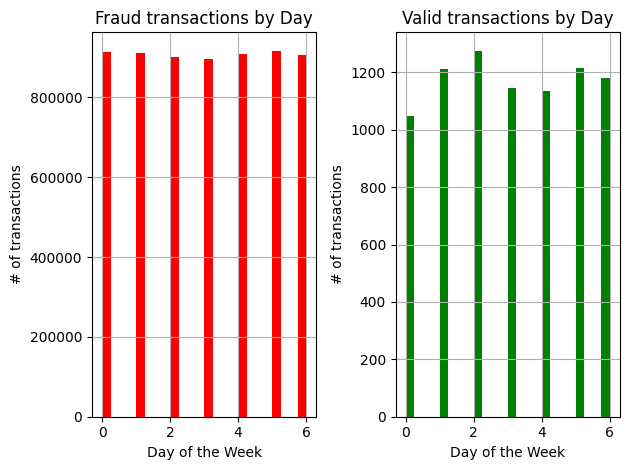

In [89]:
# plotting scatterplot of the days of the week, identifying the fraudulent transactions (red) from the valid transactions (green)
plt.subplot(1, 2, 1)
data=data_df.query('isFraud == 0')
data['step_days'].hist(bins=24,color="red")
plt.title('Fraud transactions by Day')
plt.xlabel('Day of the Week')
plt.ylabel("# of transactions")

plt.subplot(1,2,2)
data=data_df.query('isFraud == 1')
data['step_days'].hist(bins=24,color="green")
plt.title('Valid transactions by Day')
plt.xlabel('Day of the Week')
plt.ylabel("# of transactions")

plt.tight_layout()
plt.show()

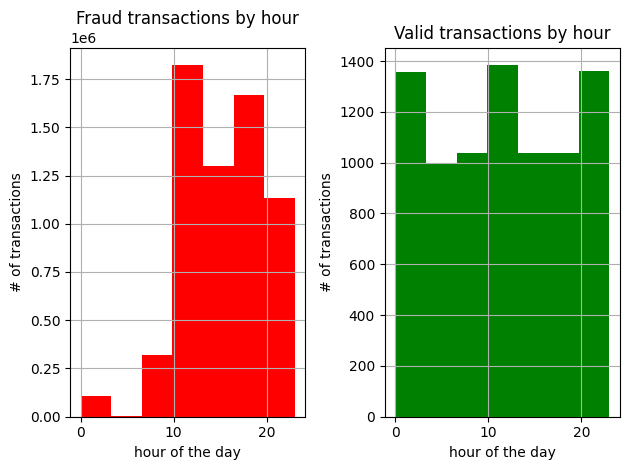

In [91]:
# plotting scatterplot of the days of the week, identifying the fraudulent transactions (red) from the valid transactions (green)
plt.subplot(1, 2, 1)
data=data_df.query('isFraud == 0')
data['step_hours'].hist(bins=7,color="red")
plt.title('Fraud transactions by hour')
plt.xlabel('hour of the day')
plt.ylabel("# of transactions")

plt.subplot(1,2,2)
data=data_df.query('isFraud == 1')
data['step_hours'].hist(bins=7,color="green")
plt.title('Valid transactions by hour')
plt.xlabel('hour of the day')
plt.ylabel("# of transactions")

plt.tight_layout()
plt.show()

In [63]:
# Preform label encoding for gender variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
lableencoder_X_2 = LabelEncoder()


In [64]:
data_df['type'] = lableencoder_X_2.fit_transform(data_df['type'])
data_df['nameOrig'] = lableencoder_X_2.fit_transform(data_df['nameOrig'])
data_df['nameDest'] = lableencoder_X_2.fit_transform(data_df['nameDest'])
data_df['SnameOrig'] = lableencoder_X_2.fit_transform(data_df['SnameOrig'])
data_df['SnameDest'] = lableencoder_X_2.fit_transform(data_df['SnameDest'])

In [65]:
data_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,SnameOrig,SnameDest,step_days,step_hours
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0,0,1,1,1
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0,0,1,1,1
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0,0,0,1,1
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0,0,0,1,1
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0,0,1,1,1


In [75]:
from sklearn.model_selection import train_test_split
X=data_df[['step','type','amount','nameOrig','oldbalanceOrg','newbalanceOrig','nameDest','oldbalanceDest','newbalanceDest','SnameOrig','SnameDest','step_days','step_hours']]
#X=data_df[['step','type','amount','nameOrig','nameDest','SnameOrig','SnameDest','step_days','step_hours']]
#X=data_df[['step','type','amount','SnameOrig','SnameDest','step_days','step_hours']]
Y=data_df[['isFraud']]

In [76]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

In [77]:
X_train.count()
X_test.count()

step              1908786
type              1908786
amount            1908786
nameOrig          1908786
oldbalanceOrg     1908786
newbalanceOrig    1908786
nameDest          1908786
oldbalanceDest    1908786
newbalanceDest    1908786
SnameOrig         1908786
SnameDest         1908786
step_days         1908786
step_hours        1908786
dtype: int64

In [78]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
           min_samples_leaf=1,
             min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')


In [79]:
model = clf.fit(X_train, y_train)

In [80]:
predicted = model.predict(X_test)


In [81]:
print(predicted)

[0 0 0 ... 0 0 0]


In [82]:
y_test.groupby(['isFraud'])['isFraud'].count()

isFraud
0    1906347
1       2439
Name: isFraud, dtype: int64

In [83]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score, confusion_matrix, roc_auc_score, roc_curve


#calculate AUC of model
auc = roc_auc_score(y_test, predicted)

#print AUC score
print('AUC: ',auc)


f1=f1_score(y_test, predicted)
#print f1 score
print('f1: ',f1)


acc=accuracy_score(y_test, predicted)
print('acc: ',acc)

precision = precision_score(y_test, predicted)
print('Precision: ',precision)


recall = recall_score(y_test, predicted)
print('Recall: ',recall)

AUC:  0.9312529726110229
f1:  0.8739356178608515
acc:  0.9996819968293984
Precision:  0.8855218855218855
Recall:  0.8626486264862648


[[1906075     272]
 [    335    2104]]


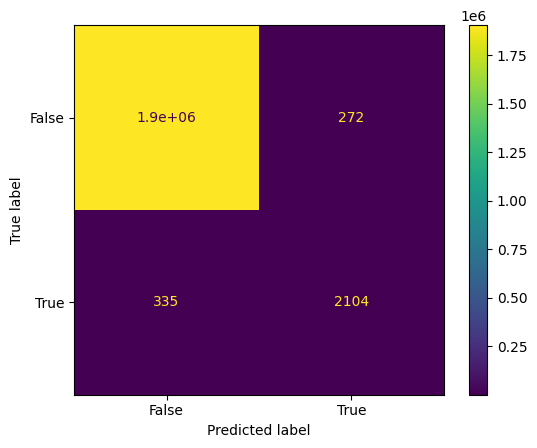

In [84]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, predicted)
print(confusion_matrix)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
import matplotlib.pyplot as plt
cm_display.plot()
plt.show()